Leave-one-group-out for the immune response prediction

In [1]:
import warnings
from anndata import ImplicitModificationWarning
warnings.filterwarnings("ignore", category=ImplicitModificationWarning)
warnings.filterwarnings("ignore")

In [2]:
import os,sys
sys.path.append(os.path.realpath(os.path.join(os.getcwd(), '..')))
import numpy as np
import scanpy as sc
import vqtcr as vq

In [3]:
path_base = '/mnt/d/Dataset/vqTCR/10xGenomics/'
path_data = path_base + 'avidity_esm.h5ad'

In [4]:
vq.set_random_seed(2025)
adata = sc.read_h5ad(path_data)
adata = adata[adata.obs['binding_name'].isin(vq.HIGH_COUNT_ANTIGENS)]
adata

View of AnnData object with n_obs × n_vars = 61096 × 5000
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'barcode',

In [5]:
params = vq.get_pred_config(lr=1e-4, latent_dim=64, dropout=0.2, 
                            num_subspace=1, codewords_per_space=64)
params['epoch'] = 20
params['pred']['dim_latent'] = 2*64
params

{'dim_latent': 64,
 'batch_size': 512,
 'lr': 0.0001,
 'dropout': 0.2,
 'epoch': 20,
 'early': 10,
 'dataset': '',
 'save_path': '',
 'direction': 'max',
 'weight_decay': 0.0001,
 'loss_weight': [1.0, 1.0, 1.0, 1.0],
 'gex': {'dim_latent': 64, 'act': 'elu', 'norm': True},
 'tcr': {'esm_type': 'facebook/esm2_t6_8M_UR50D',
  'kmer_kernels': [1, 3, 5, 7],
  'dim_latent': 64,
  'dim_emb': 64,
  'num_heads': 8,
  'forward_expansion': 4,
  'dropout': 0.2,
  'num_encoder': 2,
  'num_decoder': 2,
  'mask_rate': 0.15,
  'beta_only': False,
  'esm_tokens': True},
 'fus': {'dim_latent': 64, 'dropout': 0.2, 'film_reg': 1.0},
 'pty': {'dim_latent': 128,
  'num_subspace': 1,
  'codewords_per_space': 64,
  'eps': 1e-05,
  'init_scale': 1.0,
  'ema_decay': 0.99,
  'commitment_beta': 0.25,
  'use_cosine': True,
  'dead_code_interval': 1000,
  'dead_code_threshold': 0.0001,
  'dead_code_topk': 16,
  'diversity_weight': 0.001},
 'pred': {'dim_latent': 128, 'dropout': 0.2, 'n_labels': 8}}

Leave one donor out(LoDonor) TCR-pMHC binding prediction

pretrain on all donors

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


warmup codebook:   0%|          | 0/10 [00:00<?, ?it/s]

1.472695231437683 3.546380043029785 0.6809260845184326
1.281015157699585 3.487766742706299 0.6655604243278503
1.0998233556747437 3.454538583755493 0.6541275978088379
0.9316264390945435 3.4499969482421875 0.644219696521759
0.7938710451126099 3.439265727996826 0.6345335841178894
0.6816099286079407 3.421353578567505 0.6247962117195129
0.6003409624099731 3.4155921936035156 0.6156996488571167
0.5328773260116577 3.3942391872406006 0.606646716594696
0.48008692264556885 3.3687264919281006 0.5975104570388794
0.43737727403640747 3.3620314598083496 0.5886640548706055
0.4044763445854187 3.3476853370666504 0.5796509981155396
0.3744800090789795 3.3320541381835938 0.5708087086677551
0.35885360836982727 3.3293190002441406 0.5623623728752136
0.34035128355026245 3.3044490814208984 0.5536012053489685
0.3307301998138428 3.2949748039245605 0.54509037733078
0.3221978545188904 3.269589424133301 0.5364232063293457
0.3108955919742584 3.2569968700408936 0.5279636979103088
0.300750732421875 3.24613881111145 0.51

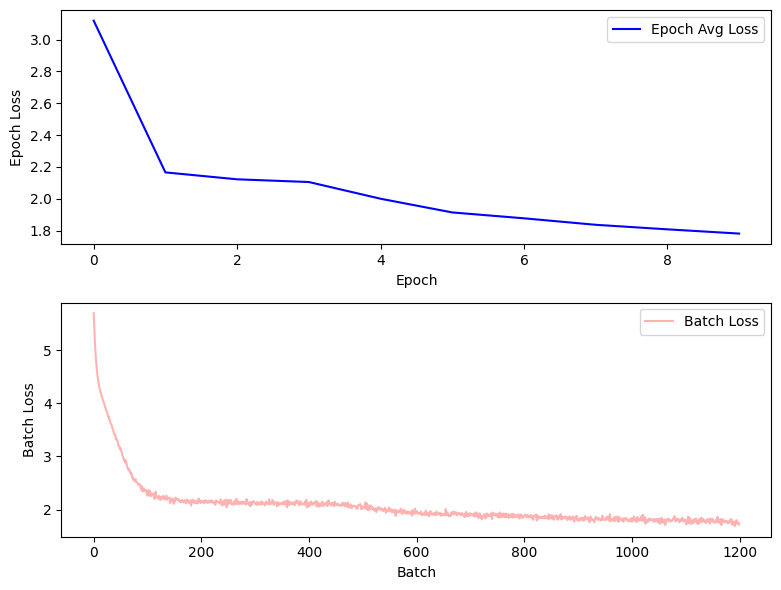

Sampling a subset of 16384 / 61096 for training
Clustering 16384 points in 128D to 64 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.15 s, search 0.14 s): objective=67491.5 imbalance=1.238 nsplit=0       


Pre-Training:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [54.45060348510742] dead_rate_per_codebook[0.015625]
0.1248064786195755 1.7151503562927246 0.008334987796843052 0.00012385944137349725
perplexity_per_codebook [54.502254486083984] dead_rate_per_codebook[0.0]
0.20813986659049988 2.9575557708740234 0.010217892937362194 0.00012878623965661973
perplexity_per_codebook [46.357887268066406] dead_rate_per_codebook[0.078125]
0.17315775156021118 2.9461183547973633 0.02648455649614334 0.0001785126223694533
perplexity_per_codebook [34.47844314575195] dead_rate_per_codebook[0.15625]
0.16380484402179718 2.9221320152282715 0.05640391260385513 0.000280656706308946
perplexity_per_codebook [23.007619857788086] dead_rate_per_codebook[0.265625]
0.1559750735759735 2.927727460861206 0.03763226047158241 0.00019453954882919788
perplexity_per_codebook [16.2434024810791] dead_rate_per_codebook[0.421875]
0.16049616038799286 2.896449565887451 0.07076596468687057 0.0003115747240372002
perplexity_per_codebook [12.164603233337402] dead_rate_p

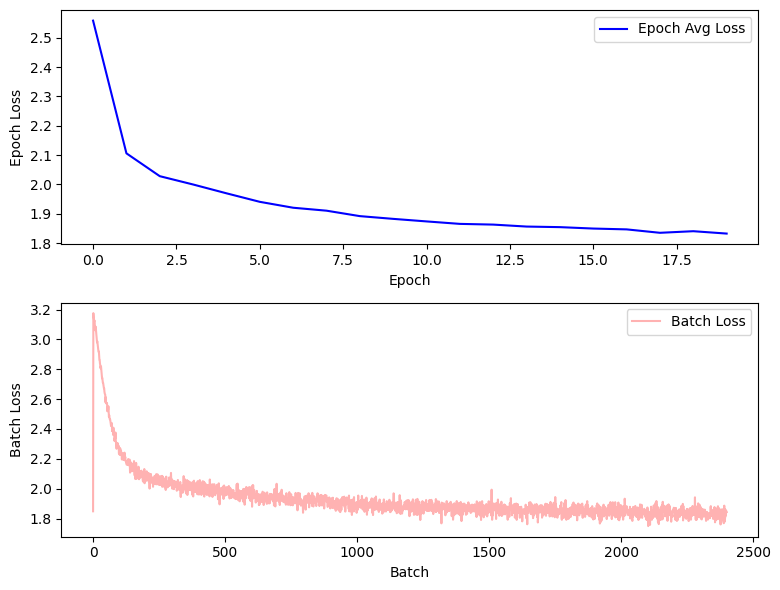

In [6]:
vqtcr = vq.vqTCR(params, adata, labels='binding_name')
vqtcr.pretrain(col_name='donor', 
               set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'],
               sample_mode='clonotype', 
               shuffle=False,
               labels=None,
               visual=True)

perplexity_per_codebook [31.362407684326172] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.854360580444336] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.775300979614258] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [25.8172607421875] dead_rate_per_codebook[0.1875]
perplexity_per_codebook [28.203533172607422] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [29.53551483154297] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [27.970170974731445] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [32.79623031616211] dead_rate_per_codebook[0.078125]
perplexity_per_codebook [29.87143325805664] dead_rate_per_codebook[0.125]
perplexity_per_codebook [24.805082321166992] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [31.081939697265625] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [33.48763656616211] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [31.19308853149414] dead_rate_per_codebook[0.09375]
perp

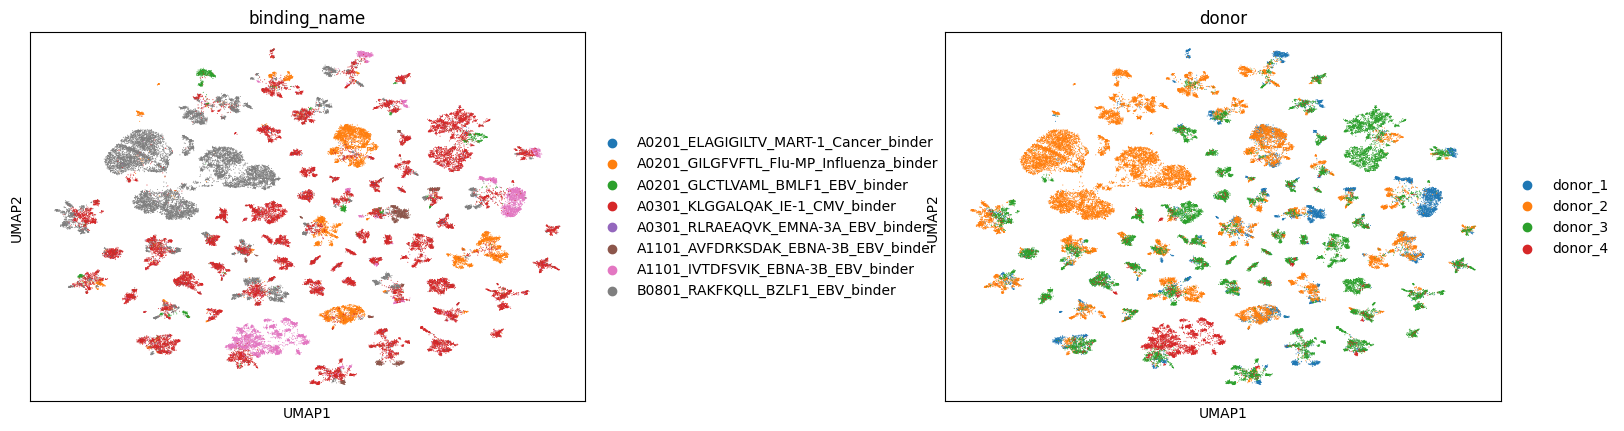

In [7]:
adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
# tcr latent space
sc.pp.neighbors(adata, use_rep='htcell')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

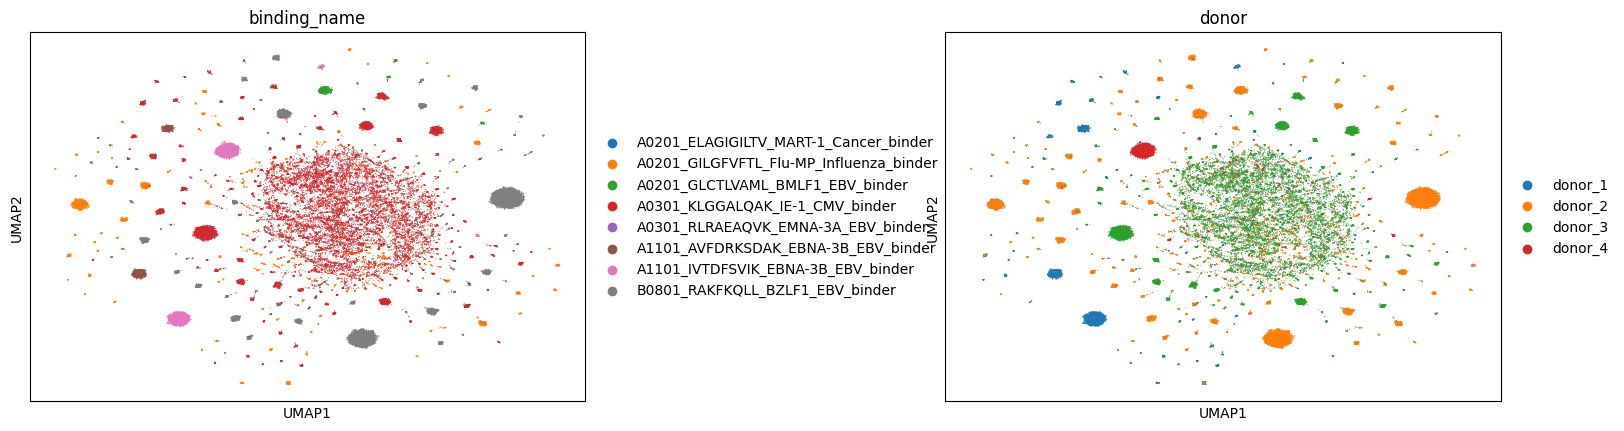

In [8]:
# tcr latent space
sc.pp.neighbors(adata, use_rep='htcr')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

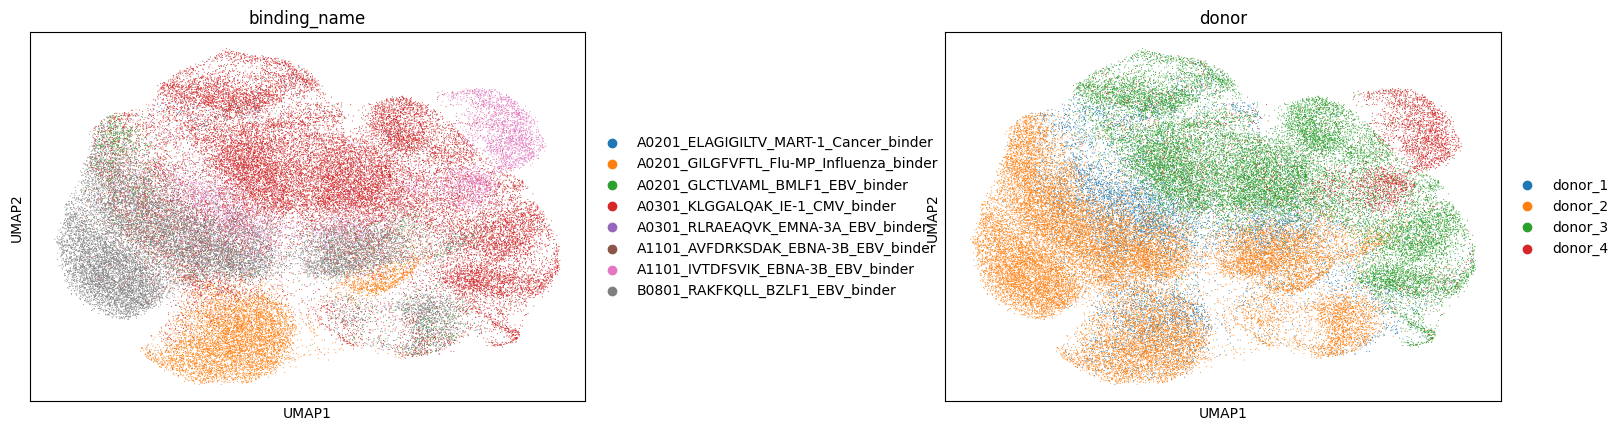

In [9]:
# gex residual latent space
sc.pp.neighbors(adata, use_rep='hgex')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

prediction training on remianing patients and test on leave-out patient

In [10]:
# test_score = vqtcr.compute_metrics(metrics='knn_prediction', eval_set='test')
record = {}
adata = vqtcr.get_latent(adata,col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
adata_train = adata[adata.obs['set'].isin(['train', 'valid'])]
adata_valid = adata[adata.obs['set']=='test']

knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                            adata_train.obs['binding_name'], 
                            adata_valid.obs['binding_name'])
record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
record['knn_prediction']

perplexity_per_codebook [31.362407684326172] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.854360580444336] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.775300979614258] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [25.8172607421875] dead_rate_per_codebook[0.1875]
perplexity_per_codebook [28.203533172607422] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [29.53551483154297] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [27.970170974731445] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [32.79623031616211] dead_rate_per_codebook[0.078125]
perplexity_per_codebook [29.87143325805664] dead_rate_per_codebook[0.125]
perplexity_per_codebook [24.805082321166992] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [31.081939697265625] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [33.48763656616211] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [31.19308853149414] dead_rate_per_codebook[0.09375]
perp

0.48888302083671586

In [11]:
adata = vq.split_adata(adata, split_col='clonotype', random_seed=2025)
record = {}
adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
adata_train = adata[adata.obs['set']=='train']
adata_valid = adata[adata.obs['set']=='test']

knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                            adata_train.obs['binding_name'], 
                            adata_valid.obs['binding_name'])
record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
record['knn_prediction']

perplexity_per_codebook [31.362407684326172] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.854360580444336] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.775300979614258] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [25.8172607421875] dead_rate_per_codebook[0.1875]
perplexity_per_codebook [28.203533172607422] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [29.53551483154297] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [27.970170974731445] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [32.79623031616211] dead_rate_per_codebook[0.078125]
perplexity_per_codebook [29.87143325805664] dead_rate_per_codebook[0.125]
perplexity_per_codebook [24.805082321166992] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [31.081939697265625] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [33.48763656616211] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [31.19308853149414] dead_rate_per_codebook[0.09375]
perp

0.8016773064392275

In [12]:
from sklearn.model_selection import LeaveOneGroupOut, LeavePGroupsOut
logo = LeaveOneGroupOut()
all_test_metrics = []
donor_ids = adata.obs.donor.to_numpy()
import numpy as np
for train_valid_idx, test_idx in logo.split(X=adata.X, groups=donor_ids):
    test_donor = donor_ids[test_idx][0]
    print(f"\n=== test on {test_donor} ===")
    adata.obs.loc[adata.obs.index[train_valid_idx], 'set']='train'
    adata.obs.loc[adata.obs.index[test_idx], 'set'] = 'test'
    record = {}
    adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
    adata_train = adata[adata.obs['set']=='train']
    adata_valid = adata[adata.obs['set']=='test']

    knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                                adata_train.obs['binding_name'], 
                                adata_valid.obs['binding_name'])
    record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
    print(record['knn_prediction'])


=== test on donor_1 ===
perplexity_per_codebook [31.362407684326172] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.854360580444336] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [24.775300979614258] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [25.8172607421875] dead_rate_per_codebook[0.1875]
perplexity_per_codebook [28.203533172607422] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [29.53551483154297] dead_rate_per_codebook[0.140625]
perplexity_per_codebook [27.970170974731445] dead_rate_per_codebook[0.15625]
perplexity_per_codebook [32.79623031616211] dead_rate_per_codebook[0.078125]
perplexity_per_codebook [29.87143325805664] dead_rate_per_codebook[0.125]
perplexity_per_codebook [24.805082321166992] dead_rate_per_codebook[0.171875]
perplexity_per_codebook [31.081939697265625] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [33.48763656616211] dead_rate_per_codebook[0.09375]
perplexity_per_codebook [31.19308853149414] dead_rate_p

In [13]:
all_test_metrics = []
for train_valid_idx, test_idx in logo.split(X=adata.X, groups=donor_ids):
    test_donor = donor_ids[test_idx][0]
    print(f"\n=== test on {test_donor} ===")
    # split train-valid dataset
    adata_train_val = adata[train_valid_idx]
    train, val = vq.split_dataset(adata_train_val, split_ratio=0.25, 
                                  split_col='clonotype', random_seed=2025)
    adata.obs['set'] = None
    adata.obs.loc[train.obs.index, 'set'] = 'train'
    adata.obs.loc[val.obs.index, 'set'] = 'valid'
    adata.obs.loc[adata.obs.index[test_idx], 'set'] = 'test'
    trainloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['train'],
                                     sample_mode='clonotype',
                                     shuffle=False, 
                                     labels='binding_name')
    validloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['valid'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    testloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['test'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    best_score = vqtcr.predict_train(trainloader, validloader)
    print(f'best score in validation: {best_score}')
    
    test_metrics = vqtcr.predict_test(testloader)
    all_test_metrics.append(test_metrics)
    
metric = 'weighted'
print("\n" + "="*60)
print("LOGO Results:")
for i, metrics in enumerate(all_test_metrics):
        print(f"Donor {np.unique(donor_ids)[i]}: "
              f"f1: {metrics[f'f1_{metric}']:.3f}, "
              f"AUC-ROC: {metrics[f'auc_roc_{metric}']:.3f}, "
              f"AUC-PR: {metrics[f'auc_pr_{metric}']:.3f}")

mean_f1 = np.nanmean([m[f'f1_{metric}'] for m in all_test_metrics])
mean_auc_roc = np.nanmean([m[f'auc_roc_{metric}'] for m in all_test_metrics])
mean_auc_pr = np.nanmean([m[f'auc_pr_{metric}'] for m in all_test_metrics])

print(f"\n Average: "
        f"fa: {mean_f1:.3f} ± {np.nanstd([m[f'f1_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-ROC: {mean_auc_roc:.3f} ± {np.nanstd([m[f'auc_roc_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-PR: {mean_auc_pr:.3f} ± {np.nanstd([m[f'auc_pr_{metric}'] for m in all_test_metrics]):.3f}")


=== test on donor_1 ===


Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [56.94471740722656] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.7430305480957] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.25638961791992] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.844993591308594] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.73993682861328] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.2984733581543] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.75847244262695] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [57.127532958984375] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.988136291503906] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.503265380859375] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [57.308807373046875] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [57.73633575439453] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.45138168334961] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.7419967651367

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [50.17934799194336] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [53.512569427490234] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [52.61374282836914] dead_rate_per_codebook[0.0]
perplexity_per_codebook [53.57624816894531] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [49.95364761352539] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [53.399574279785156] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [51.277156829833984] dead_rate_per_codebook[0.0]
perplexity_per_codebook [51.91884231567383] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [53.56590270996094] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [53.591896057128906] dead_rate_per_codebook[0.0]
perplexity_per_codebook [52.64860534667969] dead_rate_per_codebook[0.0]
perplexity_per_codebook [52.471527099609375] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [50.2027702331543] dead_rate_per_codebook[0.015625]
perplexity_per_code

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [46.45161819458008] dead_rate_per_codebook[0.078125]
perplexity_per_codebook [45.96872329711914] dead_rate_per_codebook[0.046875]
perplexity_per_codebook [46.93009948730469] dead_rate_per_codebook[0.078125]
perplexity_per_codebook [47.87227249145508] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [48.56575012207031] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [44.426570892333984] dead_rate_per_codebook[0.046875]
perplexity_per_codebook [47.16816711425781] dead_rate_per_codebook[0.046875]
perplexity_per_codebook [44.086116790771484] dead_rate_per_codebook[0.0625]
perplexity_per_codebook [47.961402893066406] dead_rate_per_codebook[0.0625]
perplexity_per_codebook [46.391700744628906] dead_rate_per_codebook[0.0625]
perplexity_per_codebook [42.32859420776367] dead_rate_per_codebook[0.078125]
perplexity_per_codebook [48.54749298095703] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [48.78211212158203] dead_rate_per_codebook[0.046875]
perp

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [53.84923553466797] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [57.5257568359375] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [54.27591323852539] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [57.2161865234375] dead_rate_per_codebook[0.0]
perplexity_per_codebook [52.75933074951172] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [56.25469970703125] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.0096321105957] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.874942779541016] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.1163330078125] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [57.73614501953125] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.68060302734375] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.0778694152832] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.08646774291992] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.847965240478516]

In [14]:
all_test_metrics = []
for i in range(5):
    adata = vq.split_adata(adata, split_col='clonotype', random_seed=i)
    trainloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['train'],
                                     sample_mode='clonotype',
                                     shuffle=False, 
                                     labels='binding_name')
    validloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['valid'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    testloader = vq.get_dataloader(adata=adata,
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['test'],
                                     sample_mode=None,
                                     shuffle=False,
                                     labels='binding_name')
    best_score = vqtcr.predict_train(trainloader, validloader)
    print(f'best score in validation: {best_score}')
    
    test_metrics = vqtcr.predict_test(testloader)
    all_test_metrics.append(test_metrics)

print("\n" + "="*60)
print("LOGO Results:")
for i, metrics in enumerate(all_test_metrics):
        print(f"splite {i}: "
              f"F1: {metrics[f'f1_{metric}']:.3f}, "
              f"AUC-ROC: {metrics[f'auc_roc_{metric}']:.3f}, "
              f"AUC-PR: {metrics[f'auc_pr_{metric}']:.3f}")
    
mean_f1 = np.nanmean([m[f'f1_{metric}'] for m in all_test_metrics])
mean_auc_roc = np.nanmean([m[f'auc_roc_{metric}'] for m in all_test_metrics])
mean_auc_pr = np.nanmean([m[f'auc_pr_{metric}'] for m in all_test_metrics])

print(f"\n Average: "
        f"F1: {mean_f1:.3f} ± {np.nanstd([m[f'f1_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-ROC: {mean_auc_roc:.3f} ± {np.nanstd([m[f'auc_roc_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-PR: {mean_auc_pr:.3f} ± {np.nanstd([m[f'auc_pr_{metric}'] for m in all_test_metrics]):.3f}")

    

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [56.7177848815918] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.599178314208984] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.15687942504883] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [58.644351959228516] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.74321365356445] dead_rate_per_codebook[0.0]
perplexity_per_codebook [58.33618927001953] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.80462646484375] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.9782600402832] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.9169807434082] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.550941467285156] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.18489074707031] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.35945129394531] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [56.812957763671875] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.746055603027344] dead_rate

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [59.452938079833984] dead_rate_per_codebook[0.0]
perplexity_per_codebook [52.364933013916016] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [55.24126052856445] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.867252349853516] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [55.7769889831543] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.33222198486328] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.995365142822266] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.94802474975586] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.66358947753906] dead_rate_per_codebook[0.0]
perplexity_per_codebook [58.162452697753906] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.338077545166016] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.16116714477539] dead_rate_per_codebook[0.03125]
perplexity_per_codebook [53.57760238647461] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.0614852905273

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [55.72705841064453] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.839256286621094] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.01230239868164] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.4718017578125] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.22159194946289] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.321720123291016] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.3944091796875] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.720176696777344] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.67724609375] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.66188430786133] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.72194290161133] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.25232696533203] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [54.696388244628906] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [55.02090835571289] dead_rate_p

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [57.6892204284668] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.57720947265625] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.110595703125] dead_rate_per_codebook[0.0]
perplexity_per_codebook [53.02021789550781] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.17937088012695] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [54.82799530029297] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [55.827144622802734] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [55.61763381958008] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.081172943115234] dead_rate_per_codebook[0.0]
perplexity_per_codebook [54.869842529296875] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.60374450683594] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.5262451171875] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.2018928527832] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.3699035644531

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [56.31377029418945] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.23579406738281] dead_rate_per_codebook[0.0]
perplexity_per_codebook [56.68993377685547] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.828590393066406] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [55.422176361083984] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.63312530517578] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [53.684547424316406] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.71223449707031] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.5150146484375] dead_rate_per_codebook[0.0]
perplexity_per_codebook [57.60771942138672] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [55.70941925048828] dead_rate_per_codebook[0.015625]
perplexity_per_codebook [56.772850036621094] dead_rate_per_codebook[0.0]
perplexity_per_codebook [55.594459533691406] dead_rate_per_codebook[0.015625]
perplexity_per_codeb

F1: 0.550 ± 0.115, AUC-ROC: 0.754 ± 0.054, AUC-PR: 0.357 ± 0.070